In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam


In [2]:
# Load the pre-installed dataset
data = load_breast_cancer()

# Convert to DataFrame for convenience
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Target: 0 = malignant (cancer), 1 = benign
print(df.head())
print(df['target'].value_counts())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

# Separate normal and anomaly
X_normal = X_scaled[df['target'] == 1]  # benign
X_anomaly = X_scaled[df['target'] == 0]  # malignant

# Split normal data for training and testing
X_train, X_test = train_test_split(X_normal, test_size=0.2, random_state=42)


In [4]:
# Define dimensions
input_dim = X_train.shape[1]
encoding_dim = 10  # latent space size

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(1e-5))(input_layer)
encoder = Dense(5, activation='relu')(encoder)

# Decoder
decoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 755 (2.95 KB)

 Trainable params: 755 (2.95 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
autoencoder.compile(optimizer=Adam(learning_rate=1e-3),
                    loss='mse',
                    metrics=['mae'])


In [6]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.3134 - mae: 1.0034 - val_loss: 1.3425 - val_mae: 1.0168
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.2828 - mae: 0.9998 - val_loss: 1.3223 - val_mae: 1.0076
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.2971 - mae: 1.0008 - val_loss: 1.2997 - val_mae: 0.9969
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2803 - mae: 0.9855 - val_loss: 1.2731 - val_mae: 0.9838
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.2692 - mae: 0.9787 - val_loss: 1.2415 - val_mae: 0.9682
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.1507 - mae: 0.9370 - val_loss: 1.2042 - val_mae: 0.9494
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.2691 - mae: 0.9520 - val_loss: 1.1615 - val_mae: 0.9276
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0764 - mae: 0.8970 - val_loss: 1.1145 - val_mae: 0.9031
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0407 - mae: 0.8823 - 

In [7]:
# Test on both normal and anomaly data
X_combined = np.concatenate([X_normal, X_anomaly])
y_combined = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])  # 0=normal, 1=anomaly

# Predict reconstruction
X_pred = autoencoder.predict(X_combined)

# Calculate reconstruction error (MSE)
mse = np.mean(np.power(X_combined - X_pred, 2), axis=1)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [8]:
threshold = np.mean(mse[:len(X_normal)]) + 3*np.std(mse[:len(X_normal)])
print("Reconstruction error threshold:", threshold)


Reconstruction error threshold: 2.708734289270898


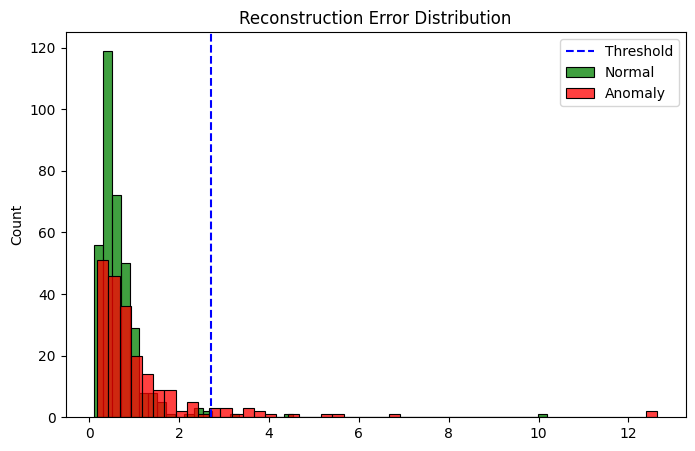

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(mse[y_combined == 0], bins=50, color='green', label='Normal')
sns.histplot(mse[y_combined == 1], bins=50, color='red', label='Anomaly')
plt.axvline(threshold, color='blue', linestyle='--', label='Threshold')
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()


In [10]:
# Predict anomalies
y_pred = (mse > threshold).astype(int)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_combined, y_pred))
print("\nClassification Report:\n", classification_report(y_combined, y_pred))


Confusion Matrix:
 [[354   3]
 [194  18]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.99      0.78       357
         1.0       0.86      0.08      0.15       212

    accuracy                           0.65       569
   macro avg       0.75      0.54      0.47       569
weighted avg       0.72      0.65      0.55       569

